In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('Fever.csv')
df.head(20)

A  B  Volunteer  Relief
0   1  1          1     2.4
1   1  1          2     2.7
2   1  1          3     2.3
3   1  1          4     2.5
4   1  2          1     4.6
5   1  2          2     4.2
6   1  2          3     4.9
7   1  2          4     4.7
8   1  3          1     4.8
9   1  3          2     4.5
10  1  3          3     4.4
11  1  3          4     4.6
12  2  1          1     5.8
13  2  1          2     5.2
14  2  1          3     5.5
15  2  1          4     5.3
16  2  2          1     8.9
17  2  2          2     9.1
18  2  2          3     8.7
19  2  2          4     9.0

In [3]:
df.shape

(36, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
df.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [6]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [21]:
dupes = df.duplicated()
sum(dupes)

0

In [22]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [23]:
df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

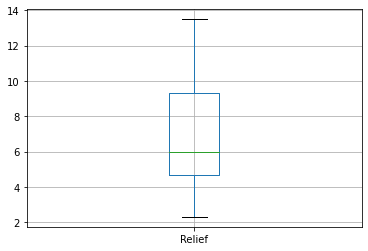

In [24]:
df.boxplot(column=['Relief'])
plt.show()

## For A
$H_0$ : The means of A are same for 1, 2, 3 i.e. μ1=μ2=μ3

$H_1$ : At least one of the means is not equal

## For B
$H_0$ : The means of B are same for 1, 2, 3 i.e. μ1=μ2=μ3

$H_1$ : At least one of the means is not equal

In [10]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis ($H_0$).

In [11]:
formulaa = 'Relief ~ C(B)'
modell = ols(formulaa, df).fit()
aov_tablee = anova_lm(modell)
print(aov_tablee)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis ($H_0$).

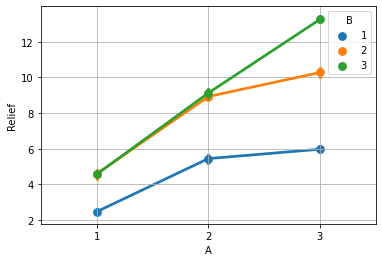

In [19]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df)
plt.grid()
plt.show()

In [20]:
model=ols('Relief~C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


As A and B interaction is 6.972083e-17 which is <0.05 , there seems to be statistical interaction between A and B.

The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. 

In [81]:
daf = pd.read_csv('Education_Post_12th_Standard.csv')
daf.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [71]:
daf.describe(include='all')

Names          Apps        Accept       Enroll   Top10perc  \
count              777    777.000000    777.000000   777.000000  777.000000   
unique             777           NaN           NaN          NaN         NaN   
top     Pitzer College           NaN           NaN          NaN         NaN   
freq                 1           NaN           NaN          NaN         NaN   
mean               NaN   3001.638353   2018.804376   779.972973   27.558559   
std                NaN   3870.201484   2451.113971   929.176190   17.640364   
min                NaN     81.000000     72.000000    35.000000    1.000000   
25%                NaN    776.000000    604.000000   242.000000   15.000000   
50%                NaN   1558.000000   1110.000000   434.000000   23.000000   
75%                NaN   3624.000000   2424.000000   902.000000   35.000000   
max                NaN  48094.000000  26330.000000  6392.000000   96.000000   

         Top25perc   F.Undergrad   P.Undergrad      Outstate   Room.Board  \
count   777.000000    777.000000    777.000000    777.000000   777.000000   
unique         NaN           NaN           NaN           NaN          NaN   
top            NaN           NaN           NaN           NaN          NaN   
freq           NaN           NaN           NaN           NaN          NaN   
mean     55.796654   3699.907336    855.298584  10440.669241  4357.526384   
std      19.804778   4850.420531   1522.431887   4023.016484  1096.696416   
min       9.000000    139.000000      1.000000   2340.000000  1780.000000   
25%      41.000000    992.000000     95.000000   7320.000000  3597.000000   
50%      54.000000   1707.000000    353.000000   9990.000000  4200.000000   
75%      69.000000   4005.000000    967.000000  12925.000000  5050.000000   
max     100.000000  31643.000000  21836.000000  21700.000000  8124.000000   

              Books     Personal         PhD    Terminal   S.F.Ratio  \
count    777.000000   777.000000  777.000000  777.000000  777.000000   
unique          NaN          NaN         NaN         NaN         NaN   
top             NaN          NaN         NaN         NaN         NaN   
freq            NaN          NaN         NaN         NaN         NaN   
mean     549.380952  1340.642214   72.660232   79.702703   14.089704   
std      165.105360   677.071454   16.328155   14.722359    3.958349   
min       96.000000   250.000000    8.000000   24.000000    2.500000   
25%      470.000000   850.000000   62.000000   71.000000   11.500000   
50%      500.000000  1200.000000   75.000000   82.000000   13.600000   
75%      600.000000  1700.000000   85.000000   92.000000   16.500000   
max     2340.000000  6800.000000  103.000000  100.000000   39.800000   

        perc.alumni        Expend  Grad.Rate  
count    777.000000    777.000000  777.00000  
unique          NaN           NaN        NaN  
top             NaN           NaN        NaN  
freq            NaN           NaN        NaN  
mean      22.743887   9660.171171   65.46332  
std       12.391801   5221.768440   17.17771  
min        0.000000   3186.000000   10.00000  
25%       13.000000   6751.000000   53.00000  
50%       21.000000   8377.000000   65.00000  
75%       31.000000  10830.000000   78.00000  
max       64.000000  56233.000000  118.00000

In [14]:
daf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [3]:
col1 = daf['Apps']
col1.head()

0    1660
1    2186
2    1428
3     417
4     193
Name: Apps, dtype: int64

In [4]:
daf.shape

(777, 18)

In [17]:
len(col1)

777

In [15]:
daf.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

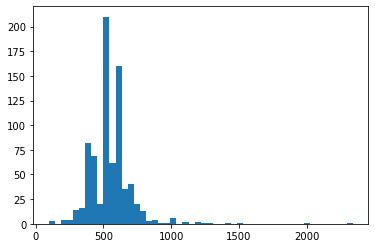

In [30]:
plt.hist(daf['Books'], bins=50);

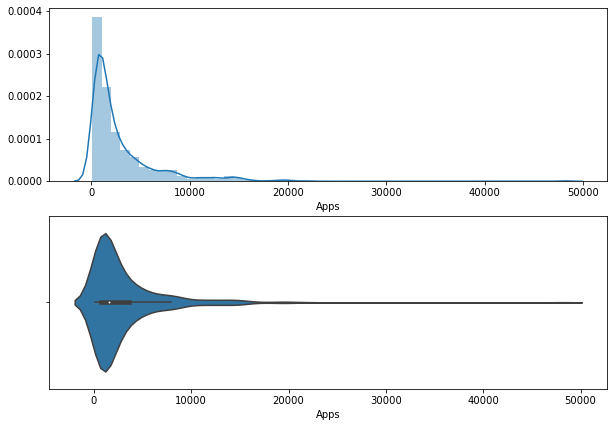

In [66]:
plt.figure(figsize= (10,7))
plt.subplot(2,1,1)
sns.distplot(daf['Apps'])
plt.subplot(2,1,2)
sns.violinplot(daf['Apps'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

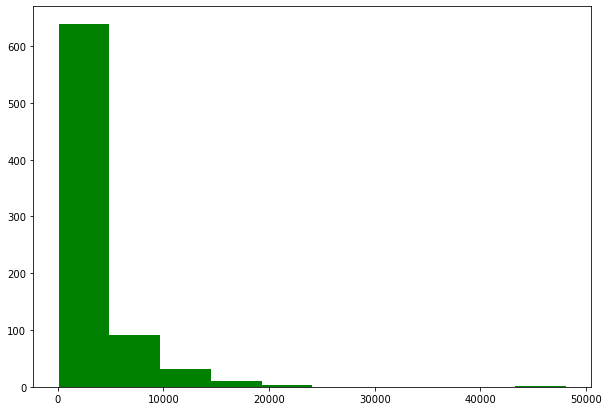

In [98]:
plt.figure(figsize=(10,7)) # makes the plot wider
plt.hist(daf['Apps'], color='g') # plots a simple histogram
plt.axvline(daf.mean(), color='m', linewidth=1)
plt.axvline(daf.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(daf.mode()[0], color='w', linestyle='dashed', linewidth=1)

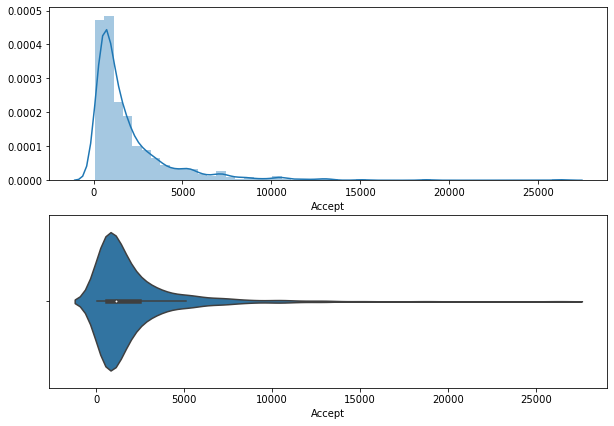

In [65]:
plt.figure(figsize= (10,7))
plt.subplot(2,1,1)
sns.distplot(daf['Accept'])
plt.subplot(2,1,2)
sns.violinplot(daf['Accept'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

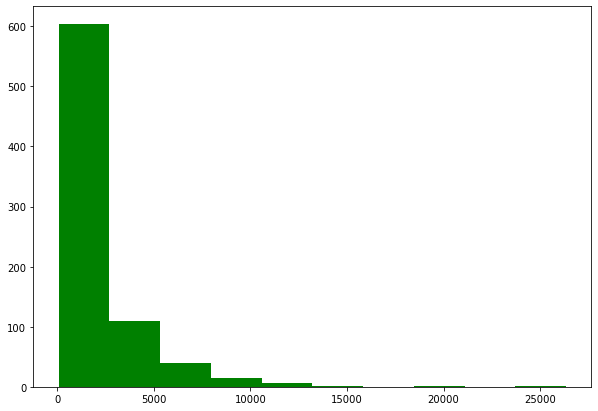

In [97]:
plt.figure(figsize=(10,7)) # makes the plot wider
plt.hist(daf['Accept'], color='g') # plots a simple histogram
plt.axvline(daf.mean(), color='m', linewidth=1)
plt.axvline(daf.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(daf.mode()[0], color='w', linestyle='dashed', linewidth=1)

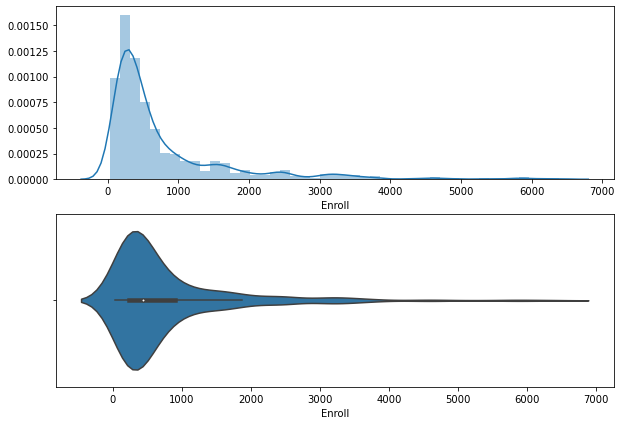

In [64]:
plt.figure(figsize= (10,7))
plt.subplot(2,1,1)
sns.distplot(daf['Enroll'])
plt.subplot(2,1,2)
sns.violinplot(daf['Enroll'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

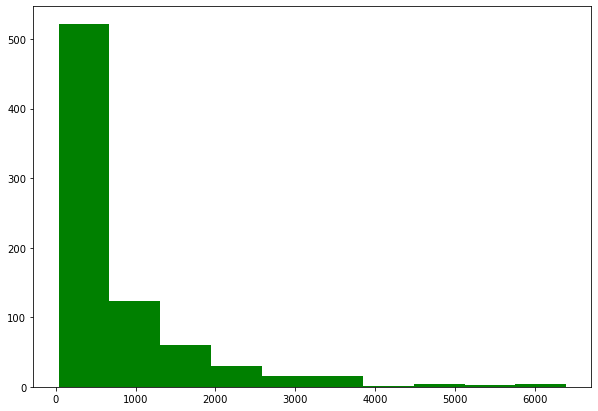

In [96]:
plt.figure(figsize=(10,7)) # makes the plot wider
plt.hist(daf['Enroll'], color='g') # plots a simple histogram
plt.axvline(daf.mean(), color='m', linewidth=1)
plt.axvline(daf.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(daf.mode()[0], color='w', linestyle='dashed', linewidth=1)

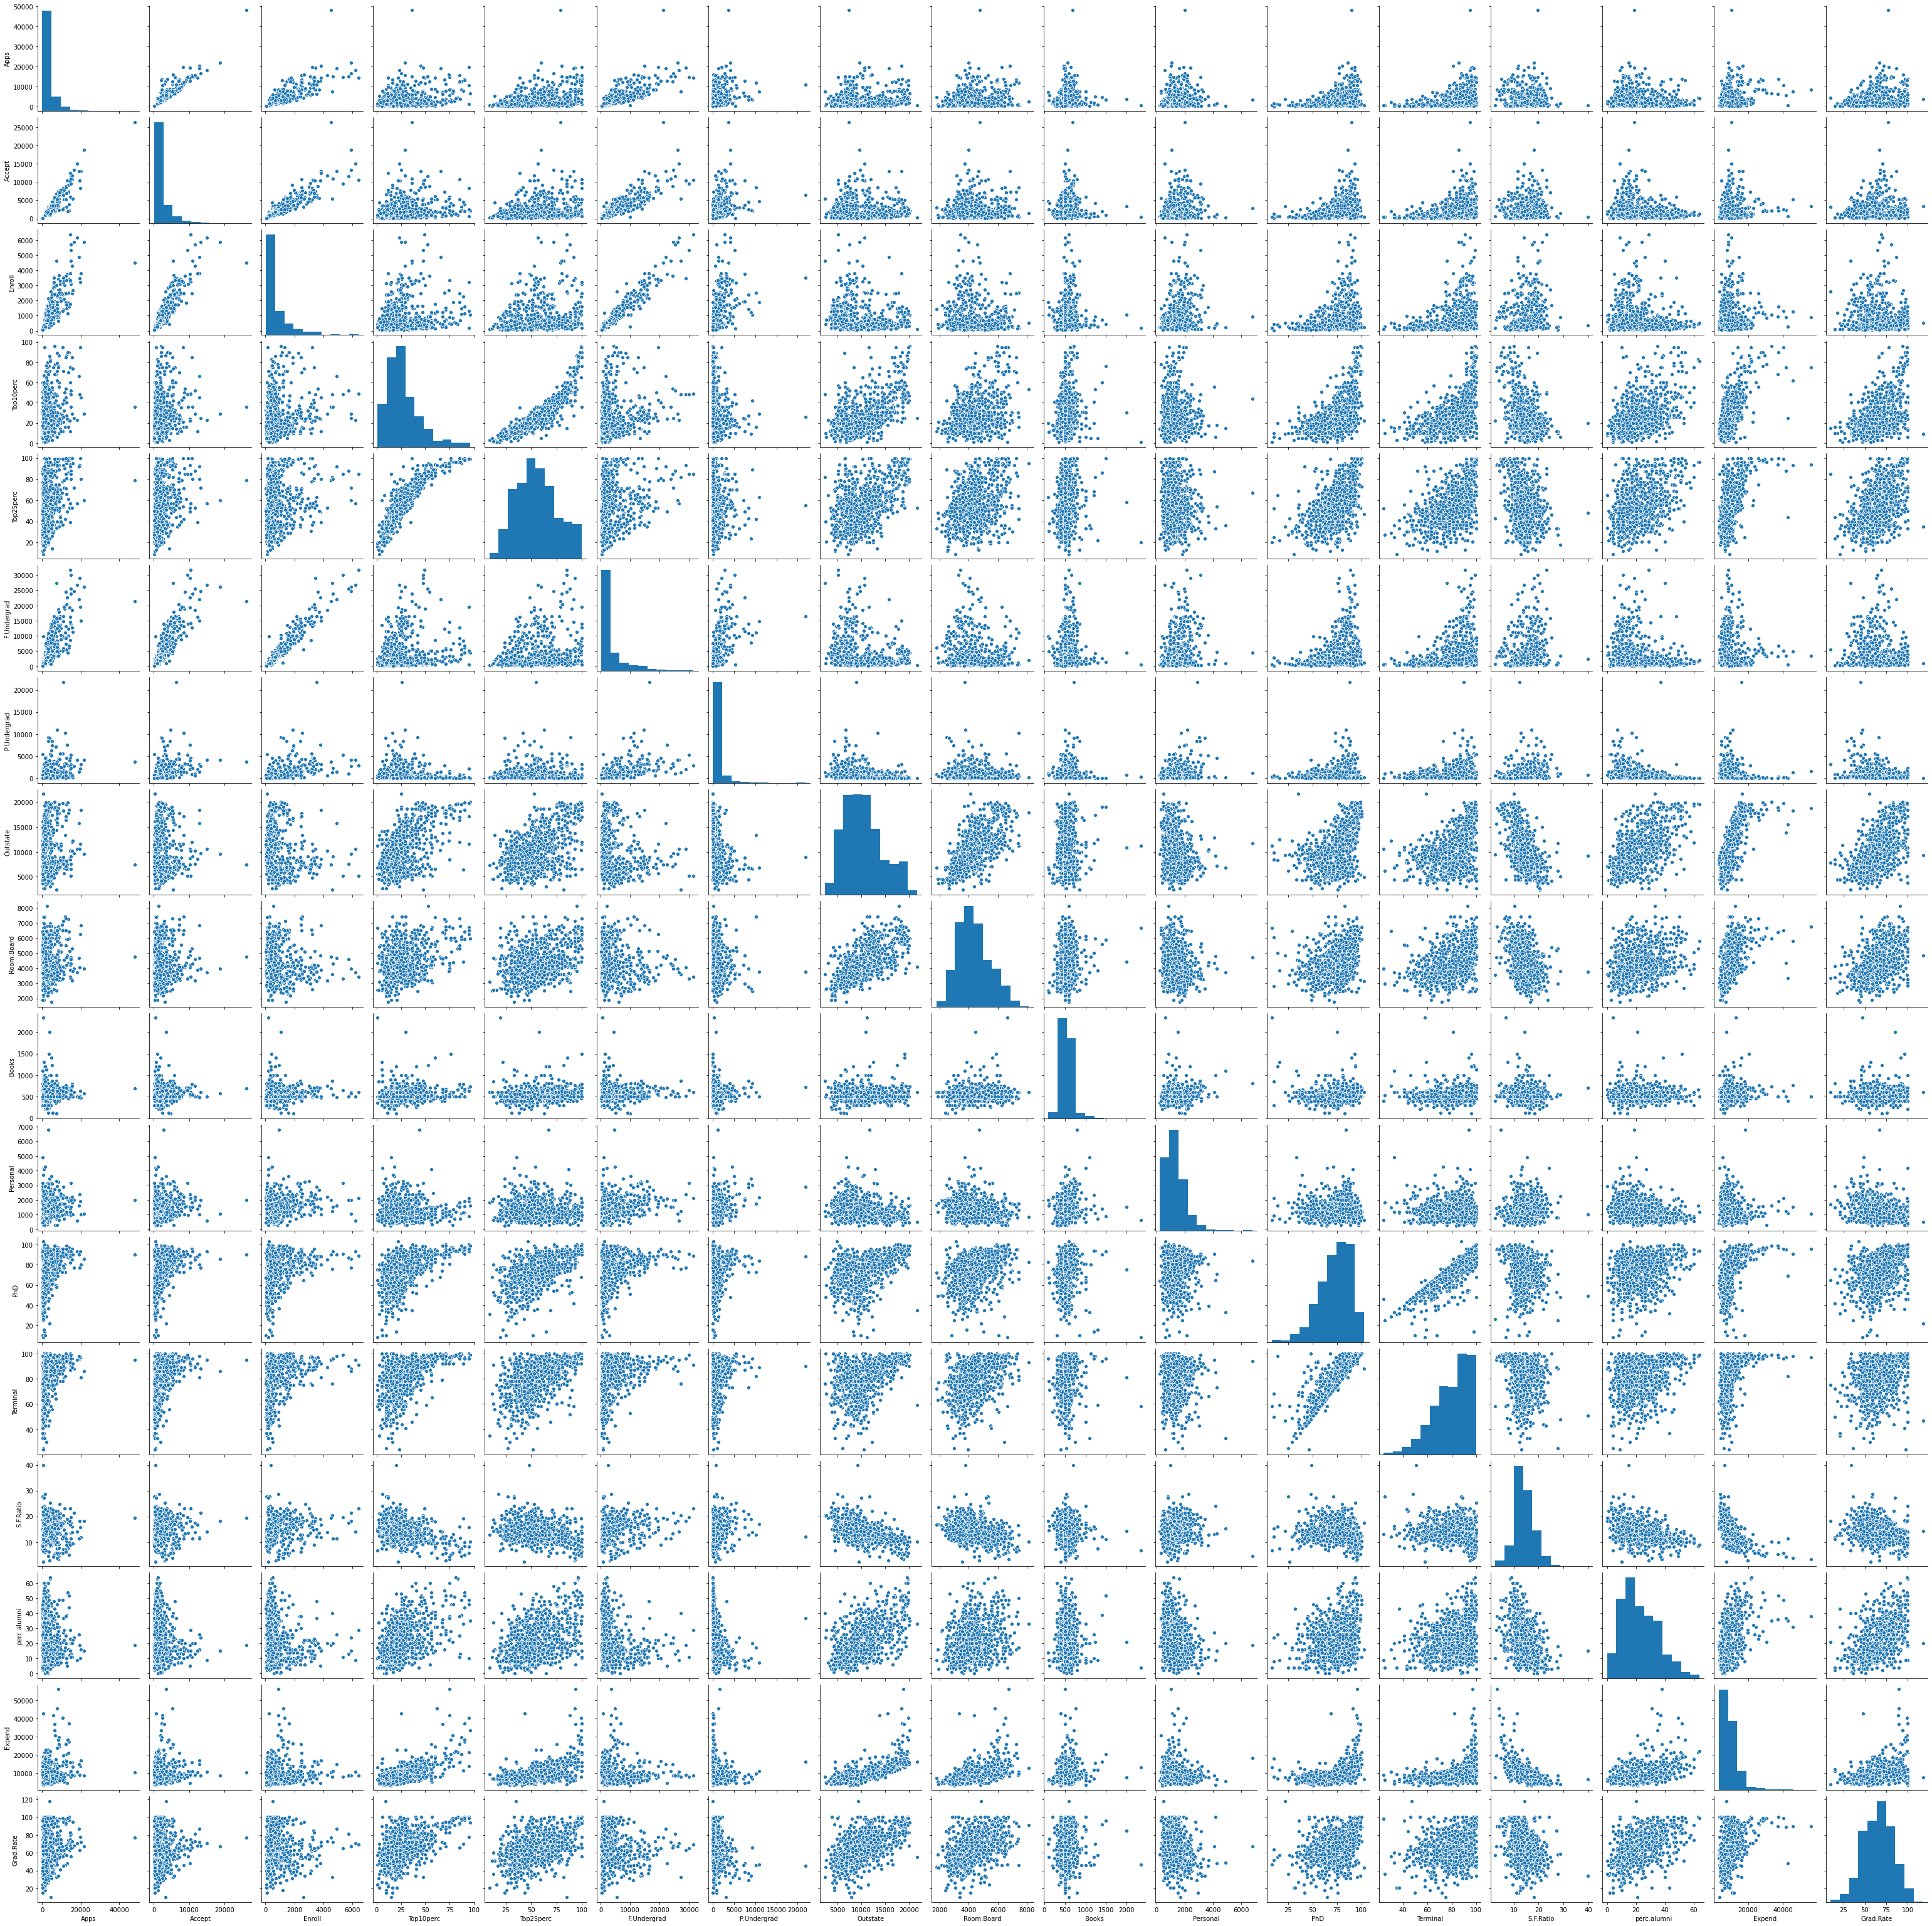

In [19]:
sns.pairplot(daf)

In [68]:
daf.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [67]:
daf.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

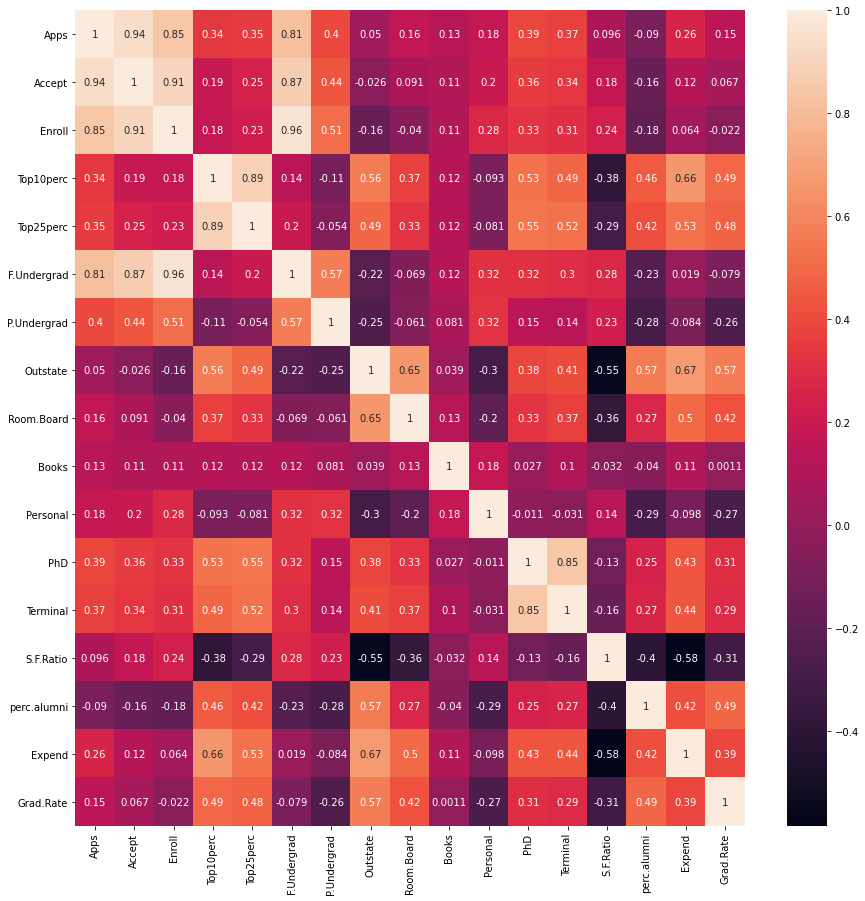

In [17]:
plt.figure(figsize= (15,15))
sns.heatmap(daf.corr(), annot = True)

In [26]:
dupes = daf.duplicated()
sum(dupes)

0

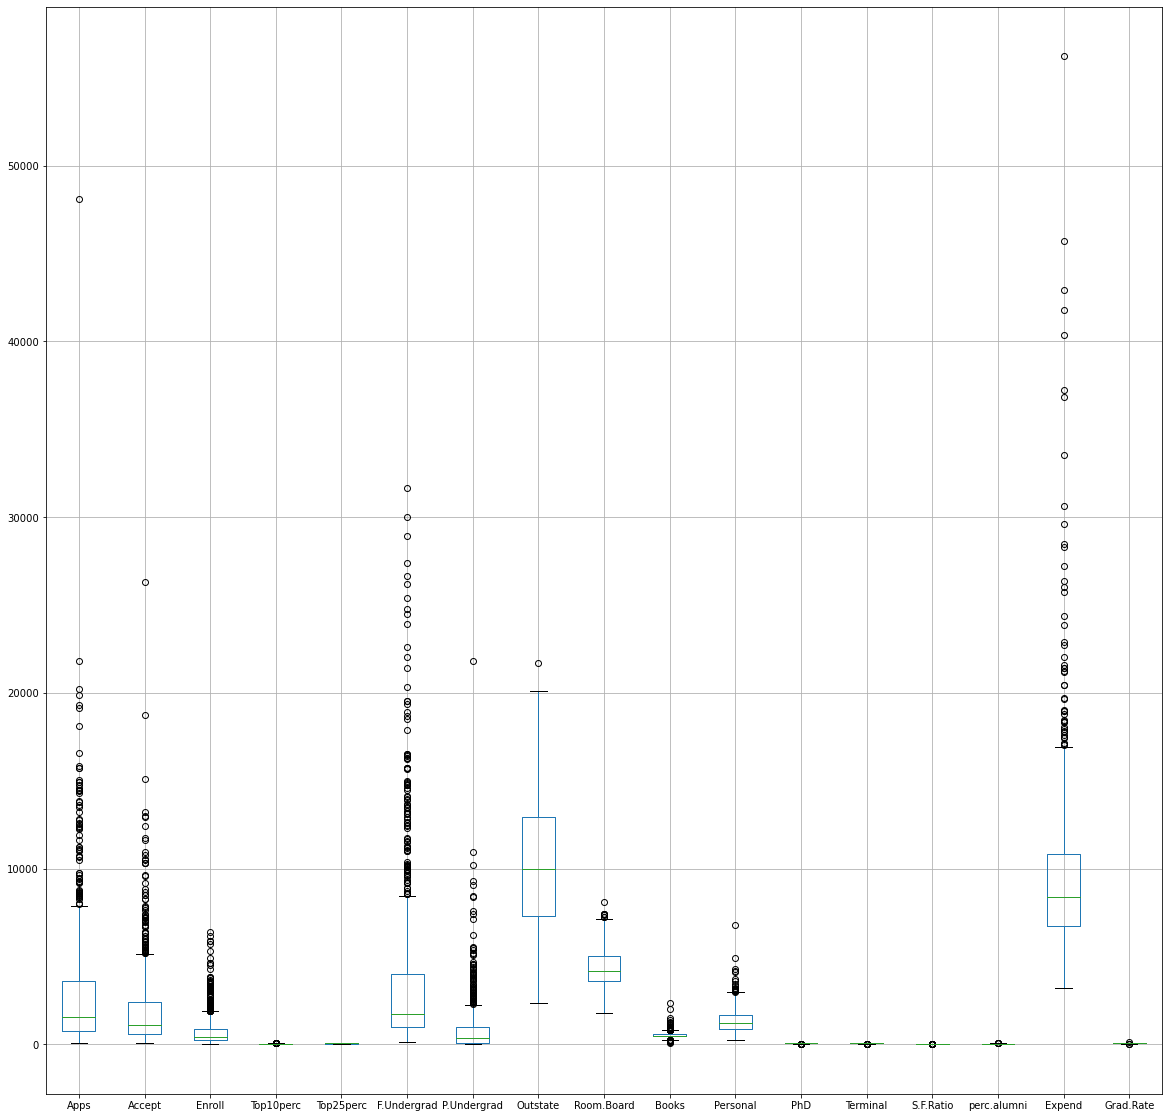

In [29]:
plt.figure(figsize= (20,20))
daf.boxplot()

In [72]:
daf_new = pd.read_csv('Education_Post_12th_Standard.csv')
daf_new.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [110]:
daf_neww = pd.read_csv('Education_Post_12th_Standard.csv')
daf_neww.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [111]:
daf_neww['Apps'] = StandardScaler().fit_transform(daf_neww[['Apps']])
daf_neww['Accept'] = StandardScaler().fit_transform(daf_neww[['Accept']])
daf_neww['Enroll'] = StandardScaler().fit_transform(daf_neww[['Enroll']])
daf_neww['Top10perc'] = StandardScaler().fit_transform(daf_neww[['Top10perc']])
daf_neww['Top25perc'] = StandardScaler().fit_transform(daf_neww[['Top25perc']])
daf_neww['F.Undergrad'] = StandardScaler().fit_transform(daf_neww[['F.Undergrad']])
daf_neww['P.Undergrad'] = StandardScaler().fit_transform(daf_neww[['P.Undergrad']])
daf_neww['Outstate'] = StandardScaler().fit_transform(daf_neww[['Outstate']])
daf_neww['Room.Board'] = StandardScaler().fit_transform(daf_neww[['Room.Board']])
daf_neww['Books'] = StandardScaler().fit_transform(daf_neww[['Books']])
daf_neww['Personal'] = StandardScaler().fit_transform(daf_neww[['Personal']])
daf_neww['PhD'] = StandardScaler().fit_transform(daf_neww[['PhD']])
daf_neww['Terminal'] = StandardScaler().fit_transform(daf_neww[['Terminal']])
daf_neww['S.F.Ratio'] = StandardScaler().fit_transform(daf_neww[['S.F.Ratio']])
daf_neww['perc.alumni'] = StandardScaler().fit_transform(daf_neww[['perc.alumni']])
daf_neww['Expend'] = StandardScaler().fit_transform(daf_neww[['Expend']])
daf_neww['Grad.Rate'] = StandardScaler().fit_transform(daf_neww[['Grad.Rate']])
daf_neww.head()

Names      Apps    Accept    Enroll  Top10perc  \
0  Abilene Christian University -0.346882 -0.321205 -0.063509  -0.258583   
1            Adelphi University -0.210884 -0.038703 -0.288584  -0.655656   
2                Adrian College -0.406866 -0.376318 -0.478121  -0.315307   
3           Agnes Scott College -0.668261 -0.681682 -0.692427   1.840231   
4     Alaska Pacific University -0.726176 -0.764555 -0.780735  -0.655656   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
0  -0.191827    -0.168116    -0.209207 -0.746356   -0.964905 -0.602312   
1  -1.353911    -0.209788     0.244307  0.457496    1.909208  1.215880   
2  -0.292878    -0.549565    -0.497090  0.201305   -0.554317 -0.905344   
3   1.677612    -0.658079    -0.520752  0.626633    0.996791 -0.602312   
4  -0.596031    -0.711924     0.009005 -0.716508   -0.216723  1.518912   

   Personal       PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  1.270045 -0.163028 -0.115729   1.013776    -0.867574 -0.501910  -0.318252  
1  0.235515 -2.675646 -3.378176  -0.477704    -0.544572  0.166110  -0.551262  
2 -0.259582 -1.204845 -0.931341  -0.300749     0.585935 -0.177290  -0.667767  
3 -0.688173  1.185206  1.175657  -1.615274     1.151188  1.792851  -0.376504  
4  0.235515  0.204672 -0.523535  -0.553542    -1.675079  0.241803  -2.939613

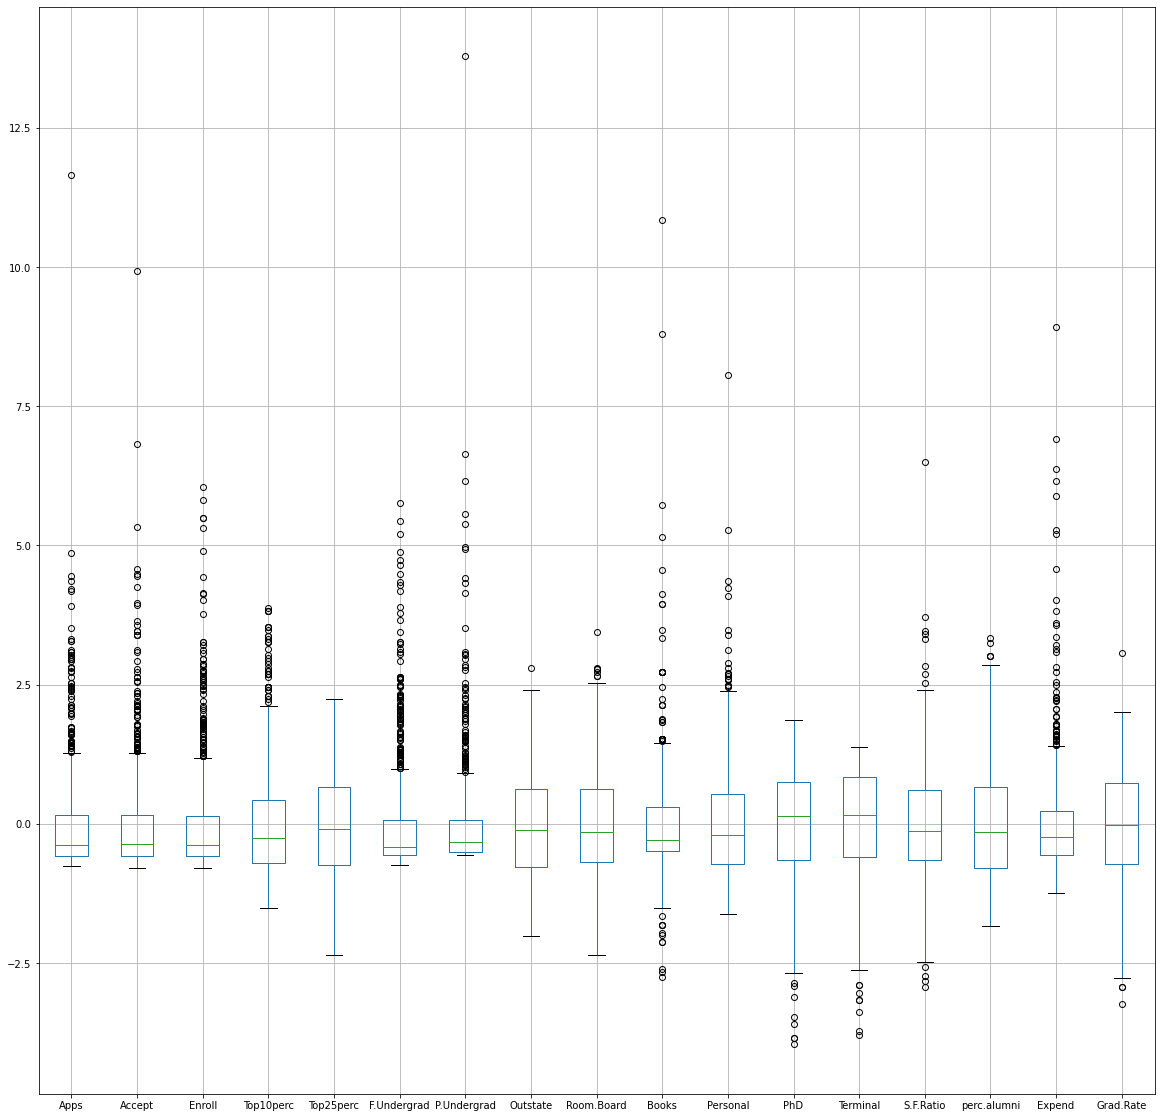

In [112]:
plt.figure(figsize= (20,20))
daf_neww.boxplot()

In [73]:
daf_new.shape

(777, 18)

In [74]:
def calculate_limit(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    return lower_limit, upper_limit

In [75]:
ll_Apps, ul_Apps = calculate_limit(daf_new['Apps'])
ll_Accept, ul_Accept = calculate_limit(daf_new['Accept'])
ll_Enroll, ul_Enroll = calculate_limit(daf_new['Enroll'])
ll_Top10perc, ul_Top10perc = calculate_limit(daf_new['Top10perc'])
ll_Top25perc, ul_Top25perc = calculate_limit(daf_new['Top25perc'])
ll_F_Undergrad, ul_F_Undergrad = calculate_limit(daf_new['F.Undergrad'])
ll_P_Undergrad, ul_P_Undergrad = calculate_limit(daf_new['P.Undergrad'])
ll_Outstate, ul_Outstate = calculate_limit(daf_new['Outstate'])
ll_Room_Board, ul_Room_Board = calculate_limit(daf_new['Room.Board'])
ll_Books, ul_Books = calculate_limit(daf_new['Books'])
ll_Personal, ul_Personal = calculate_limit(daf_new['Personal'])
ll_PhD, ul_PhD = calculate_limit(daf_new['PhD'])
ll_Terminal, ul_Terminal = calculate_limit(daf_new['Terminal'])
ll_S_F_Ratio, ul_S_F_Ratio = calculate_limit(daf_new['S.F.Ratio'])
ll_perc_alumini, ul_perc_alumini = calculate_limit(daf_new['perc.alumni'])
ll_Expend, ul_Expend = calculate_limit(daf_new['Expend'])
ll_Grad_Rate, ul_Grad_Rate = calculate_limit(daf_new['Grad.Rate'])

In [76]:
daf_new['Apps'] = np.where(daf_new['Apps']<ll_Apps, ll_Apps, daf_new['Apps'])
daf_new['Apps'] = np.where(daf_new['Apps']>ul_Apps, ul_Apps, daf_new['Apps'])
daf_new['Accept'] = np.where(daf_new['Accept']<ll_Accept, ll_Accept, daf_new['Accept'])
daf_new['Accept'] = np.where(daf_new['Accept']>ul_Accept, ul_Accept, daf_new['Accept'])
daf_new['Enroll'] = np.where(daf_new['Enroll']<ll_Enroll, ll_Enroll, daf_new['Enroll'])
daf_new['Enroll'] = np.where(daf_new['Enroll']>ul_Enroll, ul_Enroll, daf_new['Enroll'])
daf_new['Top10perc'] = np.where(daf_new['Top10perc']<ll_Top10perc, ll_Top10perc, daf_new['Top10perc'])
daf_new['Top10perc'] = np.where(daf_new['Top10perc']>ul_Top10perc, ul_Top10perc, daf_new['Top10perc'])
daf_new['F.Undergrad'] = np.where(daf_new['F.Undergrad']<ll_F_Undergrad, ll_F_Undergrad, daf_new['F.Undergrad'])
daf_new['F.Undergrad'] = np.where(daf_new['F.Undergrad']>ul_F_Undergrad, ul_F_Undergrad, daf_new['F.Undergrad'])
daf_new['P.Undergrad'] = np.where(daf_new['P.Undergrad']<ll_P_Undergrad, ll_P_Undergrad, daf_new['P.Undergrad'])
daf_new['P.Undergrad'] = np.where(daf_new['P.Undergrad']>ul_P_Undergrad, ul_P_Undergrad, daf_new['P.Undergrad'])
daf_new['Outstate'] = np.where(daf_new['Outstate']<ll_Outstate, ll_Outstate, daf_new['Outstate'])
daf_new['Outstate'] = np.where(daf_new['Outstate']>ul_Outstate, ul_Outstate, daf_new['Outstate'])
daf_new['Room.Board'] = np.where(daf_new['Room.Board']<ll_Room_Board, ll_Room_Board, daf_new['Room.Board'])
daf_new['Room.Board'] = np.where(daf_new['Room.Board']>ul_Room_Board, ul_Room_Board, daf_new['Room.Board'])
daf_new['Books'] = np.where(daf_new['Books']<ll_Books, ll_Books, daf_new['Books'])
daf_new['Books'] = np.where(daf_new['Books']>ul_Books, ul_Books, daf_new['Books'])
daf_new['Personal'] = np.where(daf_new['Personal']<ll_Personal, ll_Personal, daf_new['Personal'])
daf_new['Personal'] = np.where(daf_new['Personal']>ul_Personal, ul_Personal, daf_new['Personal'])
daf_new['PhD'] = np.where(daf_new['PhD']<ll_PhD, ll_PhD, daf_new['PhD'])
daf_new['PhD'] = np.where(daf_new['PhD']>ul_PhD, ul_PhD, daf_new['PhD'])
daf_new['Terminal'] = np.where(daf_new['Terminal']<ll_Terminal, ll_Terminal, daf_new['Terminal'])
daf_new['Terminal'] = np.where(daf_new['Terminal']>ul_Terminal, ul_Terminal, daf_new['Terminal'])
daf_new['S.F.Ratio'] = np.where(daf_new['S.F.Ratio']<ll_S_F_Ratio, ll_S_F_Ratio, daf_new['S.F.Ratio'])
daf_new['S.F.Ratio'] = np.where(daf_new['S.F.Ratio']>ul_S_F_Ratio, ul_S_F_Ratio, daf_new['S.F.Ratio'])
daf_new['perc.alumni'] = np.where(daf_new['perc.alumni']<ll_perc_alumini, ll_perc_alumini, daf_new['perc.alumni'])
daf_new['perc.alumni'] = np.where(daf_new['perc.alumni']>ul_perc_alumini, ul_perc_alumini, daf_new['perc.alumni'])
daf_new['Expend'] = np.where(daf_new['Expend']<ll_Expend, ll_Expend, daf_new['Expend'])
daf_new['Expend'] = np.where(daf_new['Expend']>ul_Expend, ul_Expend, daf_new['Expend'])
daf_new['Grad.Rate'] = np.where(daf_new['Grad.Rate']<ll_Grad_Rate, ll_Grad_Rate, daf_new['Grad.Rate'])
daf_new['Grad.Rate'] = np.where(daf_new['Grad.Rate']>ul_Grad_Rate, ul_Grad_Rate, daf_new['Grad.Rate'])

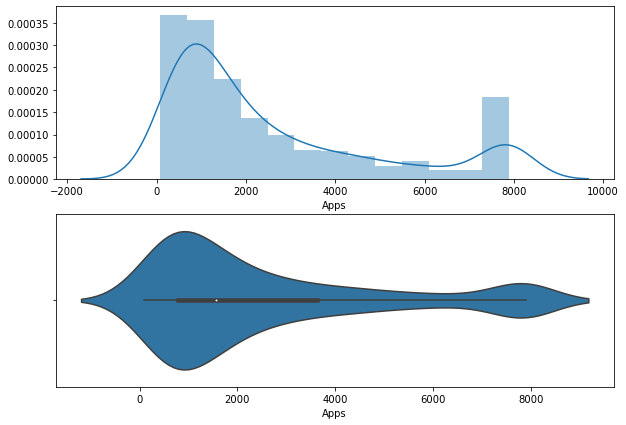

In [89]:
plt.figure(figsize= (10,7))
plt.subplot(2,1,1)
sns.distplot(daf_new['Apps'])
plt.subplot(2,1,2)
sns.violinplot(daf_new['Apps'])

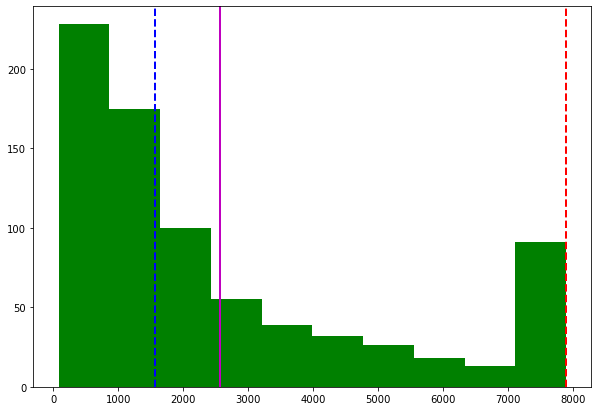

In [106]:
plt.figure(figsize=(10,7)) # makes the plot wider
plt.hist(daf_new['Apps'], color='g') # plots a simple histogram
plt.axvline(daf_new['Apps'].mean(), color='m', linewidth=2)
plt.axvline(daf_new['Apps'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(daf_new['Apps'].mode()[0], color='r', linestyle='dashed', linewidth=2)

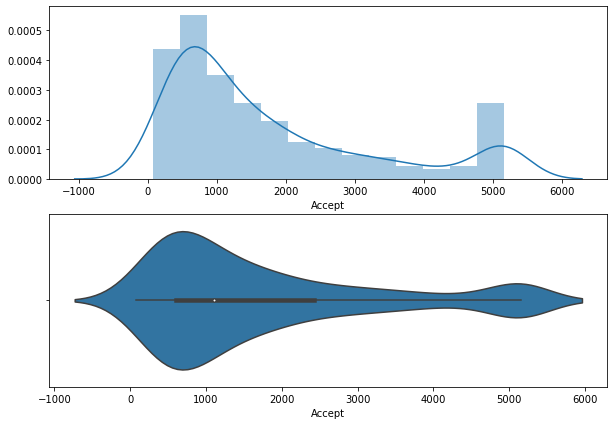

In [92]:
plt.figure(figsize= (10,7))
plt.subplot(2,1,1)
sns.distplot(daf_new['Accept'])
plt.subplot(2,1,2)
sns.violinplot(daf_new['Accept'])

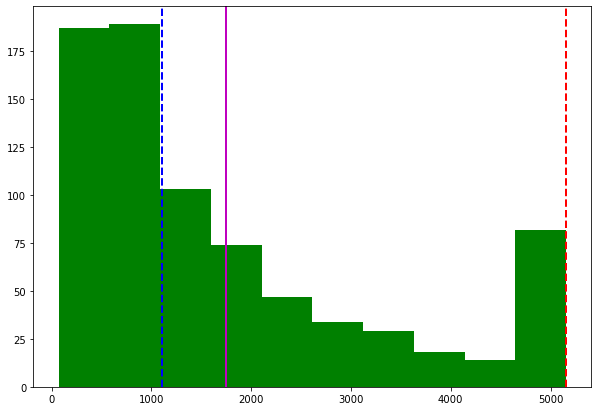

In [107]:
plt.figure(figsize=(10,7)) # makes the plot wider
plt.hist(daf_new['Accept'], color='g') # plots a simple histogram
plt.axvline(daf_new['Accept'].mean(), color='m', linewidth=2)
plt.axvline(daf_new['Accept'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(daf_new['Accept'].mode()[0], color='r', linestyle='dashed', linewidth=2)

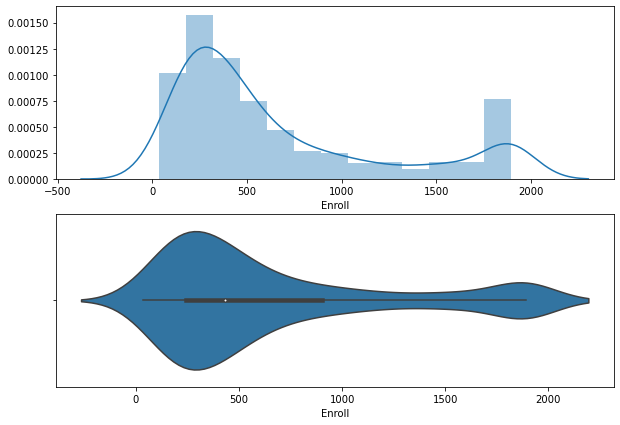

In [94]:
plt.figure(figsize= (10,7))
plt.subplot(2,1,1)
sns.distplot(daf_new['Enroll'])
plt.subplot(2,1,2)
sns.violinplot(daf_new['Enroll'])

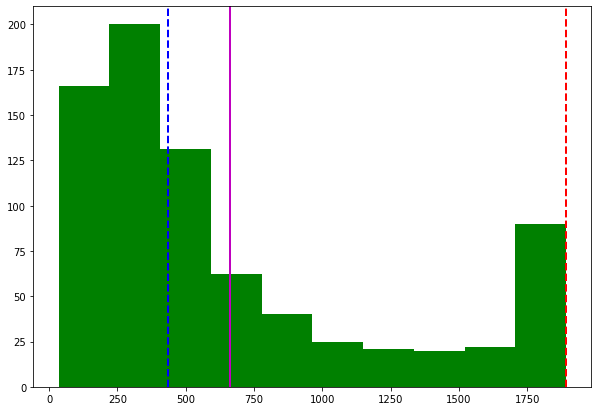

In [108]:
plt.figure(figsize=(10,7)) # makes the plot wider
plt.hist(daf_new['Enroll'], color='g') # plots a simple histogram
plt.axvline(daf_new['Enroll'].mean(), color='m', linewidth=2)
plt.axvline(daf_new['Enroll'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(daf_new['Enroll'].mode()[0], color='r', linestyle='dashed', linewidth=2)

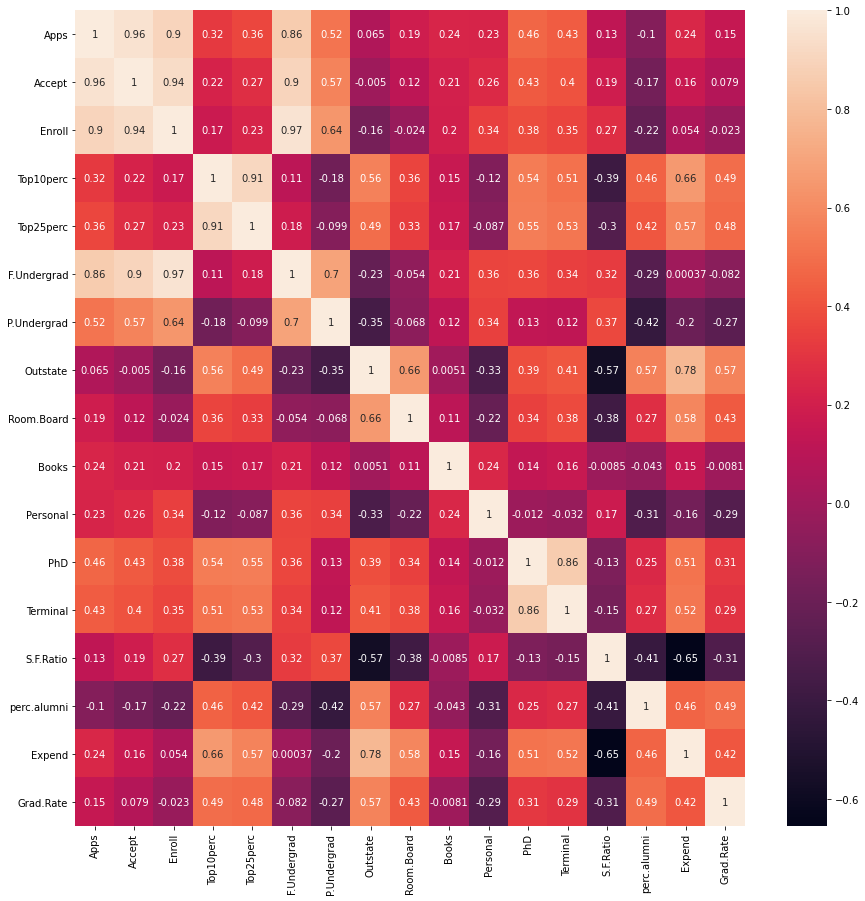

In [99]:
plt.figure(figsize= (15,15))
sns.heatmap(daf_new.corr(), annot = True)

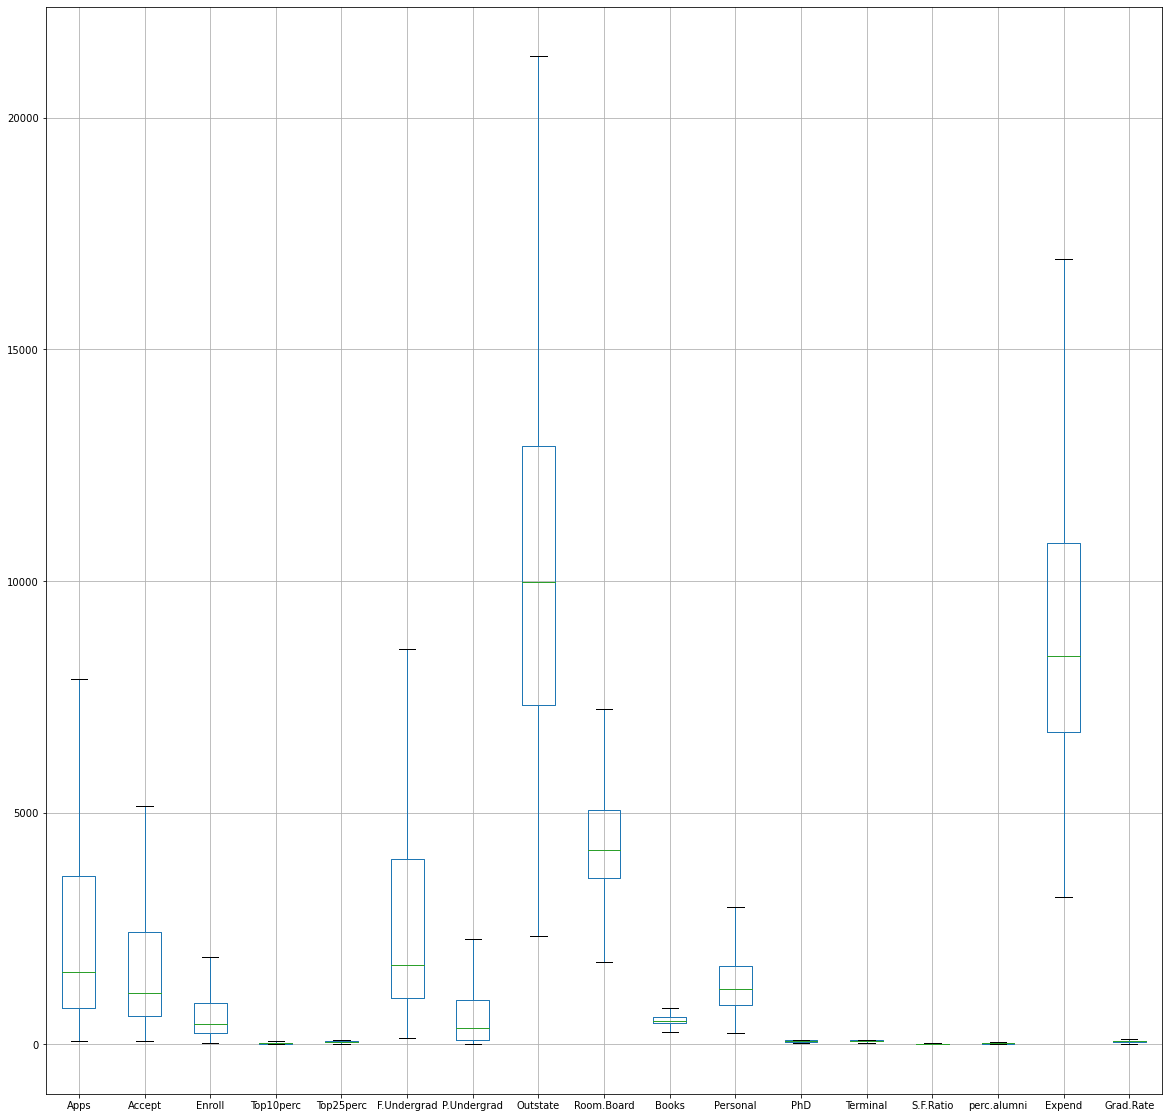

In [77]:
plt.figure(figsize= (20,20))
daf_new.boxplot()

In [48]:
daf_new.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler

In [117]:
daf_new['Apps'] = StandardScaler().fit_transform(daf_new[['Apps']])
daf_new['Accept'] = StandardScaler().fit_transform(daf_new[['Accept']])
daf_new['Enroll'] = StandardScaler().fit_transform(daf_new[['Enroll']])
daf_new['Top10perc'] = StandardScaler().fit_transform(daf_new[['Top10perc']])
daf_new['Top25perc'] = StandardScaler().fit_transform(daf_new[['Top25perc']])
daf_new['F.Undergrad'] = StandardScaler().fit_transform(daf_new[['F.Undergrad']])
daf_new['P.Undergrad'] = StandardScaler().fit_transform(daf_new[['P.Undergrad']])
daf_new['Outstate'] = StandardScaler().fit_transform(daf_new[['Outstate']])
daf_new['Room.Board'] = StandardScaler().fit_transform(daf_new[['Room.Board']])
daf_new['Books'] = StandardScaler().fit_transform(daf_new[['Books']])
daf_new['Personal'] = StandardScaler().fit_transform(daf_new[['Personal']])
daf_new['PhD'] = StandardScaler().fit_transform(daf_new[['PhD']])
daf_new['Terminal'] = StandardScaler().fit_transform(daf_new[['Terminal']])
daf_new['S.F.Ratio'] = StandardScaler().fit_transform(daf_new[['S.F.Ratio']])
daf_new['perc.alumni'] = StandardScaler().fit_transform(daf_new[['perc.alumni']])
daf_new['Expend'] = StandardScaler().fit_transform(daf_new[['Expend']])
daf_new['Grad.Rate'] = StandardScaler().fit_transform(daf_new[['Grad.Rate']])
daf_new.head()

Names      Apps    Accept    Enroll  Top10perc  \
0  Abilene Christian University -0.376493 -0.337830  0.106380  -0.246780   
1            Adelphi University -0.159195  0.116744 -0.260441  -0.696290   
2                Adrian College -0.472336 -0.426511 -0.569343  -0.310996   
3           Agnes Scott College -0.889994 -0.917871 -0.918613   2.129202   
4     Alaska Pacific University -0.982532 -1.051221 -1.062533  -0.696290   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
0  -0.191827    -0.018769    -0.166083 -0.746480   -0.968324 -0.776567   
1  -1.353911    -0.093626     0.797856  0.457762    1.921680  1.828605   
2  -0.292878    -0.703966    -0.777974  0.201488   -0.555466 -1.210762   
3   1.677612    -0.898889    -0.828267  0.626954    1.004218 -0.776567   
4  -0.596031    -0.995610     0.297726 -0.716623   -0.216006  2.219381   

   Personal       PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  1.438500 -0.174045 -0.123239   1.070602    -0.870466 -0.630916  -0.319205  
1  0.289289 -2.745731 -2.785068  -0.489511    -0.545726  0.396097  -0.552693  
2 -0.260691 -1.240354 -0.952900  -0.304413     0.590864 -0.131845  -0.669437  
3 -0.736792  1.205884  1.190391  -1.679429     1.159159  2.287940  -0.377577  
4  0.289289  0.202299 -0.538069  -0.568839    -1.682316  0.512468  -2.916759

In [109]:
daf_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [69]:
daf_new.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.956538  0.898039   0.321756   0.364961     0.862111   
Accept       0.956538  1.001289  0.936482   0.223586   0.274033     0.898190   
Enroll       0.898039  0.936482  1.001289   0.171977   0.230731     0.968549   
Top10perc    0.321756  0.223586  0.171977   1.001289   0.915053     0.111358   
Top25perc    0.364961  0.274033  0.230731   0.915053   1.001289     0.181429   
F.Undergrad  0.862111  0.898190  0.968549   0.111358   0.181429     1.001289   
P.Undergrad  0.520493  0.573429  0.642422  -0.180241  -0.099423     0.697027   
Outstate     0.065421 -0.005009 -0.155856   0.562884   0.490200    -0.226457   
Room.Board   0.187717  0.119740 -0.023876   0.357826   0.331413    -0.054546   
Books        0.236442  0.208974  0.202317   0.153650   0.169980     0.208147   
Personal     0.230244  0.256676  0.339785  -0.116880  -0.086922     0.360246   
PhD          0.464522  0.427891  0.382031   0.544749   0.552172     0.362030   
Terminal     0.435038  0.403929  0.354836   0.507401   0.528334     0.335486   
S.F.Ratio    0.126574  0.188749  0.274622  -0.388426  -0.297616     0.324922   
perc.alumni -0.101288 -0.165729 -0.223010   0.456384   0.417369    -0.285825   
Expend       0.243248  0.162017  0.054291   0.657886   0.573643     0.000371   
Grad.Rate    0.150998  0.079084 -0.023281   0.494307   0.479602    -0.082345   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.520493  0.065421    0.187717  0.236442  0.230244  0.464522   
Accept          0.573429 -0.005009    0.119740  0.208974  0.256676  0.427891   
Enroll          0.642422 -0.155856   -0.023876  0.202317  0.339785  0.382031   
Top10perc      -0.180241  0.562884    0.357826  0.153650 -0.116880  0.544749   
Top25perc      -0.099423  0.490200    0.331413  0.169980 -0.086922  0.552172   
F.Undergrad     0.697027 -0.226457   -0.054546  0.208147  0.360246  0.362030   
P.Undergrad     1.001289 -0.354673   -0.067725  0.122686  0.344496  0.127827   
Outstate       -0.354673  1.001289    0.656334  0.005117 -0.326029  0.391825   
Room.Board     -0.067725  0.656334    1.001289  0.109065 -0.219837  0.341909   
Books           0.122686  0.005117    0.109065  1.001289  0.240172  0.136566   
Personal        0.344496 -0.326029   -0.219837  0.240172  1.001289 -0.011699   
PhD             0.127827  0.391825    0.341909  0.136566 -0.011699  1.001289   
Terminal        0.122309  0.413110    0.379759  0.159523 -0.032012  0.864040   
S.F.Ratio       0.371085 -0.574422   -0.376915 -0.008547  0.174137 -0.129556   
perc.alumni    -0.419874  0.566465    0.272744 -0.042887 -0.306147  0.249198   
Expend         -0.202189  0.776327    0.581370  0.150177 -0.163481  0.511187   
Grad.Rate      -0.265499  0.573196    0.426339 -0.008061 -0.291269  0.310419   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.435038   0.126574    -0.101288  0.243248   0.150998  
Accept       0.403929   0.188749    -0.165729  0.162017   0.079084  
Enroll       0.354836   0.274622    -0.223010  0.054291  -0.023281  
Top10perc    0.507401  -0.388426     0.456384  0.657886   0.494307  
Top25perc    0.528334  -0.297616     0.417369  0.573643   0.479602  
F.Undergrad  0.335486   0.324922    -0.285825  0.000371  -0.082345  
P.Undergrad  0.122309   0.371085    -0.419874 -0.202189  -0.265499  
Outstate     0.413110  -0.574422     0.566465  0.776327   0.573196  
Room.Board   0.379759  -0.376915     0.272744  0.581370   0.426339  
Books        0.159523  -0.008547    -0.042887  0.150177  -0.008061  
Personal    -0.032012   0.174137    -0.306147 -0.163481  -0.291269  
PhD          0.864040  -0.129556     0.249198  0.511187   0.310419  
Terminal     1.001289  -0.151188     0.266375  0.524744   0.293180  
S.F.Ratio   -0.151188   1.001289    -0.412632 -0.655220  -0.308922  
perc.alumni  0.266375  -0.412632     1.001289  0.463519   0.492041  
Expend       0.524744  -0.65522

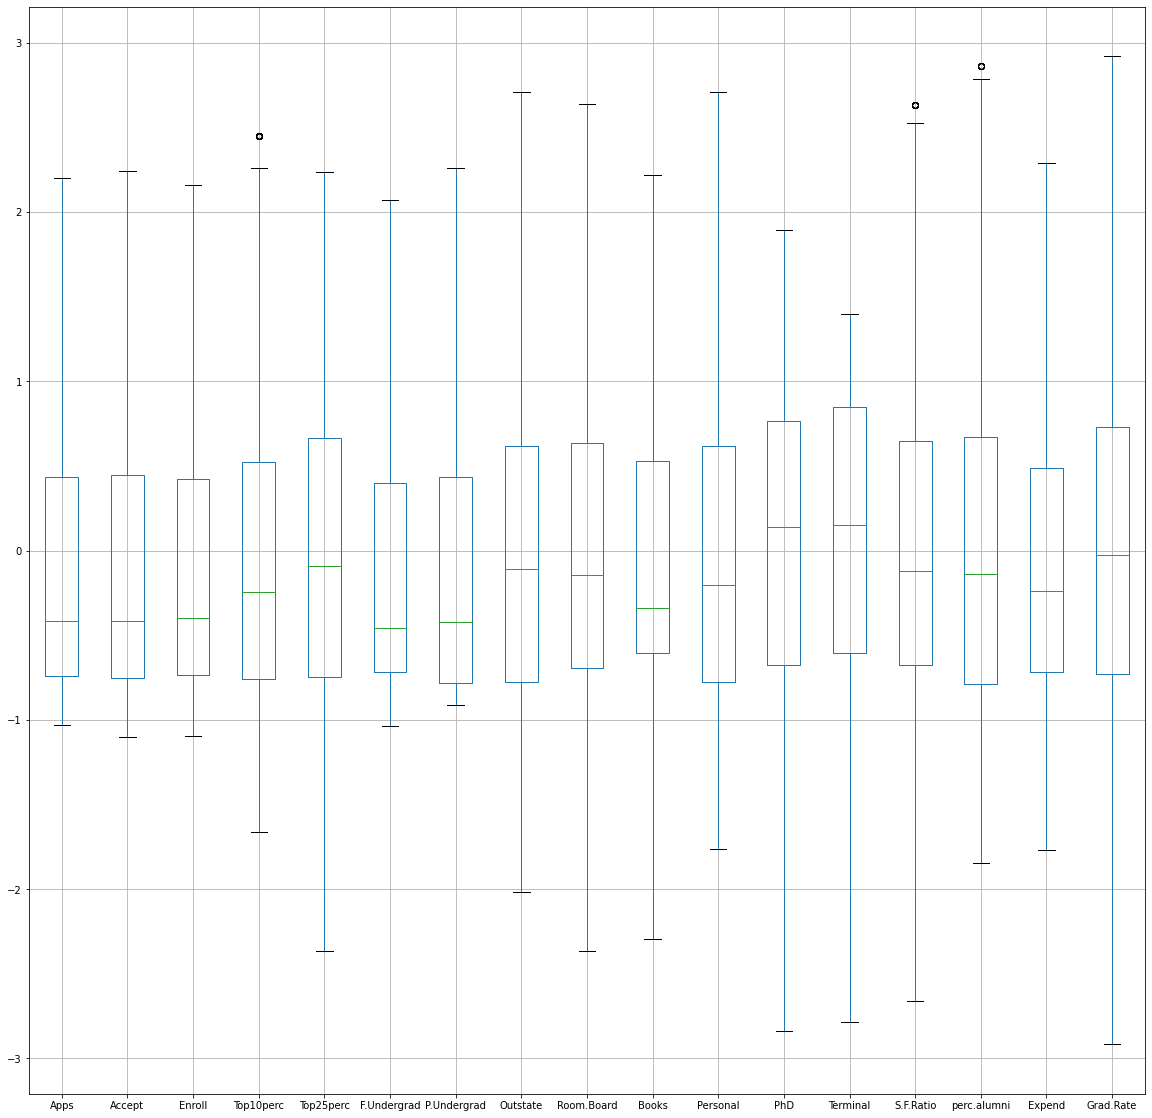

In [66]:
plt.figure(figsize= (20,20))
daf_new.boxplot()

In [118]:
data = daf_new.drop(['Names'], axis = 1)
data.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

In [119]:
from scipy.stats import zscore
data=data.apply(zscore)
data.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

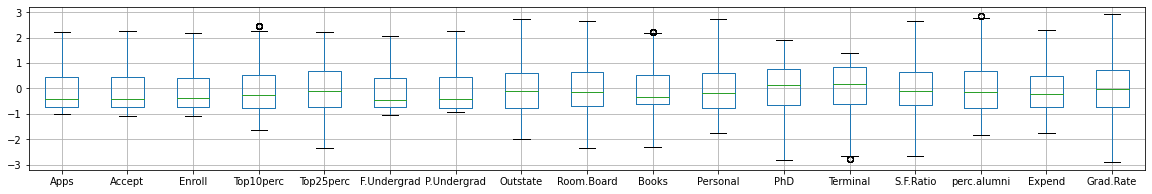

In [120]:
data.boxplot(figsize=(20,3))

In [121]:
cov_matrix = np.cov(data.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [122]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02  8.99498102e-02
  -1.30566998e-01  1.56464458e-01  8.62132843e-02 -1.82169814e-01
   5.99137640e-01 -8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02  1.37606312e-01
  -1.42275847e-01  1.49209799e-01  4.25899061e-02  3.91041719e-01
  -6.61496927e-01 -1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02  1.44216938e-01
  -5.08712481e-02  6.48997860e-02  4.38408622e-02 -7.16684935e-01
  -2.33235272e-01  3.53988202e-02 -6.19241658e-02 -4.17001280e-01
  -4.97908902e-02]
 [-3.38874521e-01 -9.93191661e-02 -7.88293849e-02  3.69115031e-01
  -1.57211016e-01 -8.88656824e-02 -2.57455284e-01 -2.89538833e-01
 

In [123]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


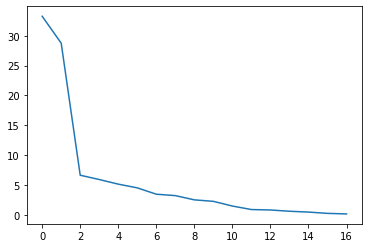

In [124]:
plt.plot(var_exp)

In [129]:
from sklearn.decomposition import PCA


pca = PCA(n_components=10)
data_reduced = pca.fit_transform(data)
data_reduced.transpose()

array([[-1.60249937e+00, -1.80467545e+00, -1.60828257e+00, ...,
        -5.76882673e-01,  6.57095200e+00, -4.77393067e-01],
       [ 9.93683013e-01, -7.04149922e-02, -1.38279212e+00, ...,
         1.77984611e-02, -1.18493014e+00,  1.04394672e+00],
       [ 3.00447636e-02,  2.12212752e+00, -5.01512552e-01, ...,
         3.22160336e-01,  1.32596561e+00, -1.42543835e+00],
       ...,
       [ 8.95166868e-01,  2.59664018e-01, -4.08817874e-01, ...,
        -2.89146665e-01,  5.73988519e-03,  6.05416581e-01],
       [-4.55351945e-01,  1.12657113e+00,  2.73071137e-01, ...,
        -5.55644192e-02, -8.68409864e-03,  6.55038265e-01],
       [-3.23644397e-01, -4.97735993e-01, -6.90840344e-01, ...,
        -4.87741957e-01, -4.12815875e-01,  1.74539561e+00]])

In [130]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [132]:
pca.components_[0]

array([ 0.26217154,  0.23056246,  0.1892764 ,  0.33887452,  0.33469053,
        0.16329301,  0.02247971,  0.28354729,  0.24418659,  0.09670828,
       -0.03522996,  0.3264107 ,  0.32311598, -0.16315164,  0.18661083,
        0.32895585,  0.23882245])

In [131]:
df_comp = pd.DataFrame(pca.components_,columns=list(data))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
4  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   
4    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787 -0.590407   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192  
4  -0.142843     0.128216 -0.022424   0.356843

In [133]:
data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [135]:
print('The Linear eq of 1st component: ')
for i in range(0,data.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),data.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.262 * Apps + 0.231 * Accept + 0.189 * Enroll + 0.339 * Top10perc + 0.335 * Top25perc + 0.163 * F.Undergrad + 0.022 * P.Undergrad + 0.284 * Outstate + 0.244 * Room.Board + 0.097 * Books + -0.035 * Personal + 0.326 * PhD + 0.323 * Terminal + -0.163 * S.F.Ratio + 0.187 * perc.alumni + 0.329 * Expend + 0.239 * Grad.Rate + 